In [29]:
import numpy as np
from numpy import dot
from numpy.linalg import norm
import cv2
from matplotlib import pyplot as plt

# Ex 1

## a)

In [1]:
def computeVectorLength(vector):
    len_of_vector = np.linalg.norm(vector)
    return len_of_vector

In [2]:
vector = np.array([-2, 4, 9, 21])
result = computeVectorLength([vector])
print(round(result,2))

23.28


## b)

In [4]:
def computeDotProduct(vector1, vector2):
    result = np.dot(vector1, vector2)
    return result

In [5]:
v1 = np.array([0, 1, -1, 2])
v2 = np.array([2, 5, 1, 0])
result = computeDotProduct(v1, v2)

print(round(result,2))

4


## c)

In [7]:
def matrix_multi_vector(matrix, vector):
    result = np.dot(matrix, vector)
    return result

In [8]:
m = np.array([[-1, 1, 1], [0, -4, 9]])
v = np.array([0, 2, 1])
result = matrix_multi_vector(m, v)
print(result)

[3 1]


## d)

In [9]:
def matrix_multi_matrix(matrix1, matrix2):
    result = np.dot(matrix1, matrix2)
    return result

In [10]:
m1 = np.array([[0, 1, 2], [2, -3, 1]])
m2 = np.array([[1, -3],[6, 1], [0, -1]])
result = matrix_multi_matrix(m1, m2)
print(result)

[[  6  -1]
 [-16 -10]]


## e)

In [11]:
def inverse_matrix(matrix):
    result = np.linalg.inv(matrix)
    return result

In [12]:
m1 = np.array([[-2, 6], [8, -4]])
result = inverse_matrix(m1)
print(result)

[[0.1  0.15]
 [0.2  0.05]]


# Ex 2

In [13]:
def compute_eigenvalues_eigenvectors(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    return eigenvalues,eigenvectors

In [14]:
matrix = np.array([[0.9, 0.2], [0.1, 0.8]])
eigenvalues, eigenvectors = compute_eigenvalues_eigenvectors(matrix)
print(eigenvectors)

[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


# Ex 3

In [16]:
def compute_cosine(v1, v2):
    cos_sim = computeDotProduct(v1,v2) / (computeVectorLength(v1)*computeVectorLength(v2))

    return cos_sim

In [17]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 0, 3, 0])
result = compute_cosine(x,y)
print(round(result, 3))

0.577


# Ex 4

In [21]:
bg1_image = cv2.imread('Exercise04_Data/GreenBackground.png', 1)
bg1_image = cv2.resize(bg1_image, (678, 381))

ob_image = cv2.imread('Exercise04_Data/Object.png', 1)
ob_image = cv2.resize(ob_image, (678, 381))

bg2_image = cv2.imread('Exercise04_Data/NewBackground.jpg', 1)
bg2_image = cv2.resize(bg2_image, (678, 381))

In [22]:
def computeDifference(bg_img, input_img):
    difference_three_channel = cv2.absdiff(bg_img, input_img)
    difference_single_channel = np.sum(difference_three_channel, axis=2) / 3.0
    difference_single_channel = difference_single_channel.astype('uint8')

    return difference_single_channel

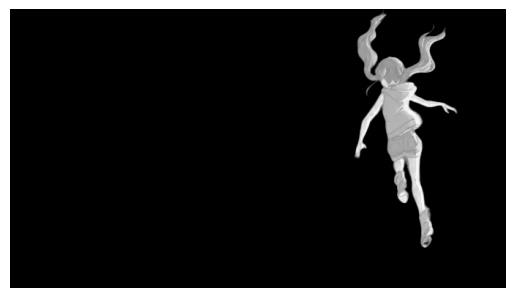

In [30]:
difference_single_channel = computeDifference(bg1_image, ob_image)

plt.imshow(difference_single_channel, cmap='gray')  # Use 'gray' colormap for single-channel images
plt.axis('off')  # Hide the axes
plt.show()

In [31]:
def computeBinaryMask(difference_single_channel):
    difference_binary = np.where(difference_single_channel >= 15, 255, 0)
    difference_binary = np.stack((difference_binary,)*3, axis=-1)
    return difference_binary

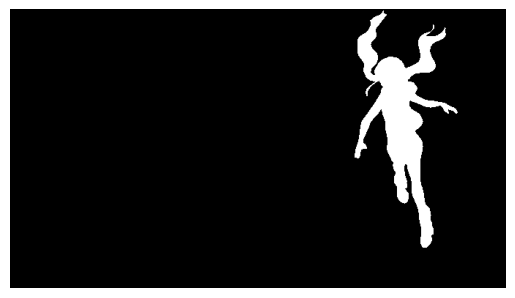

In [32]:
binary_mask = computeBinaryMask(difference_single_channel)

plt.imshow(binary_mask, cmap='gray')
plt.axis('off')  # Hide the axes
plt.show()

In [33]:
def replaceBackGround(bg1_image, bg2_image, ob_image):
    difference_single_channel = computeDifference(bg1_image,ob_image)
    binary_mask = computeBinaryMask(difference_single_channel)

    output = np.where(binary_mask==255, ob_image, bg2_image)

    return output

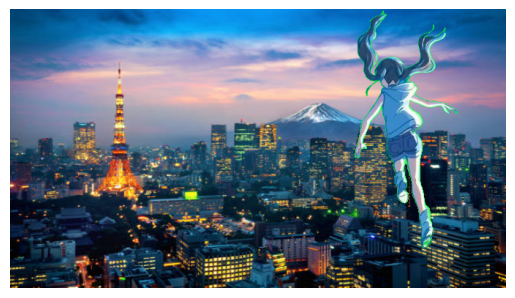

In [35]:
output = replaceBackGround(bg1_image, bg2_image, ob_image)

output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

plt.imshow(output)
plt.axis('off')
plt.show()